In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [275]:
info = pd.read_csv('lending_club_info.csv')

In [408]:
pd.set_option("display.max_colwidth", 999)


In [409]:
info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [276]:
df = pd.read_csv('lending_club_loan_two.csv')


In [258]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [164]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<AxesSubplot:xlabel='loan_status', ylabel='count'>

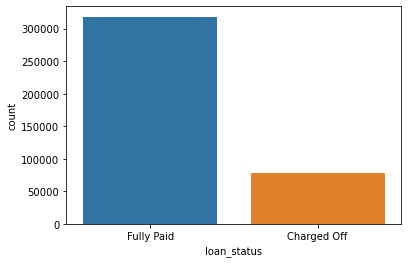

In [10]:
sns.countplot(data=df,x='loan_status')

In [277]:
df['loan'] = pd.get_dummies(df['loan_status'],drop_first=True) #1 for paid

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.017893


<AxesSubplot:>

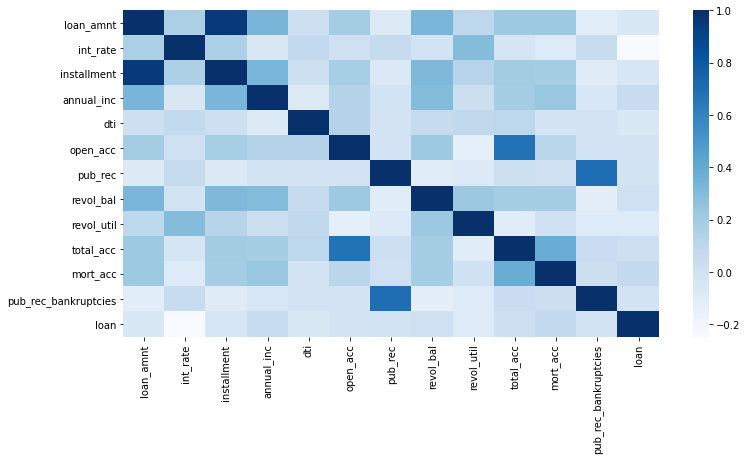

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='Blues')

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

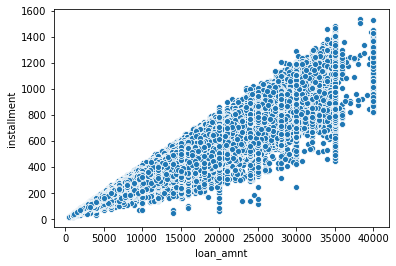

In [14]:
sns.scatterplot(data=df,x='loan_amnt',y='installment')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

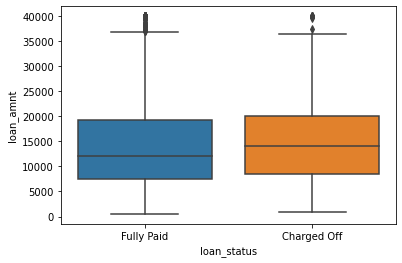

In [15]:
sns.boxplot(data=df, x='loan_status',y ='loan_amnt')

In [16]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='grade', ylabel='count'>

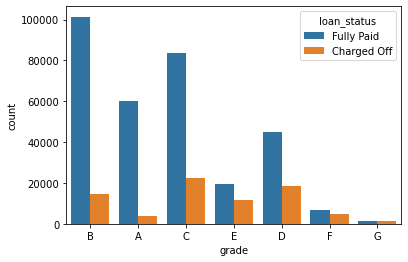

In [17]:
sns.countplot(data=df,x='grade',hue='loan_status')

In [18]:
 df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

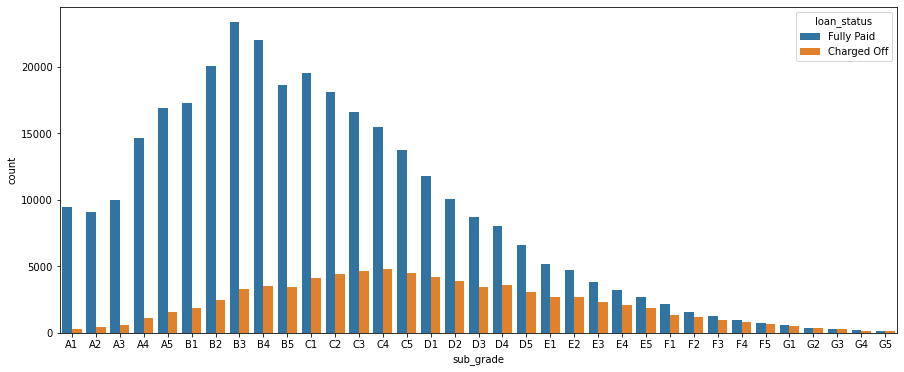

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='sub_grade',hue='loan_status',order= df['sub_grade'].sort_values().unique())

<AxesSubplot:>

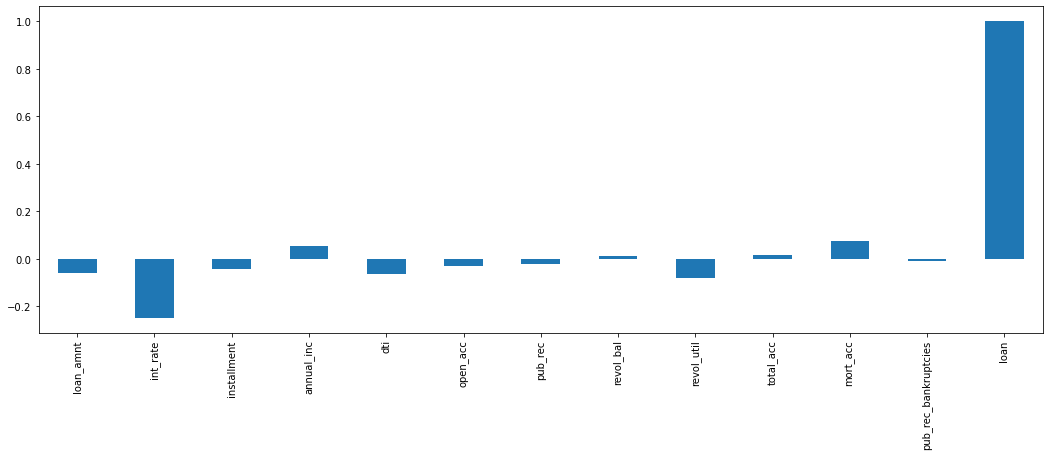

In [20]:
plt.figure(figsize=(18,6))
df.corr()['loan'].plot.bar()

In [21]:
df['revol_util'].count()

395754

In [22]:
df['revol_util'].isnull().count()

396030

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

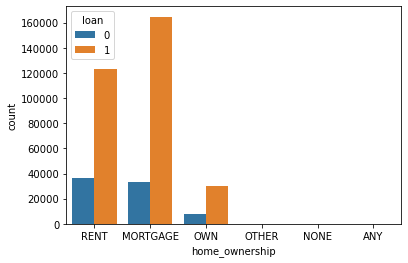

In [27]:
sns.countplot(data=df,x='home_ownership', hue='loan')

<AxesSubplot:xlabel='loan', ylabel='count'>

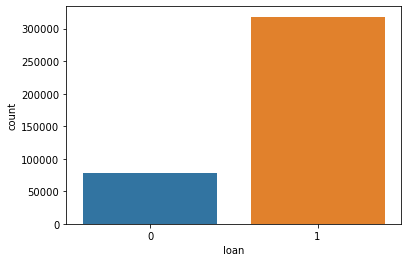

In [28]:
sns.countplot(data=df,x='loan')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan                        0
dtype: int64

<AxesSubplot:xlabel='loan', ylabel='mort_acc'>

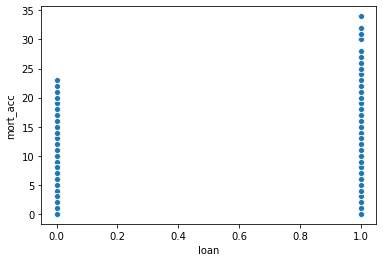

In [38]:
sns.scatterplot(data=df,x='loan',y='mort_acc')

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

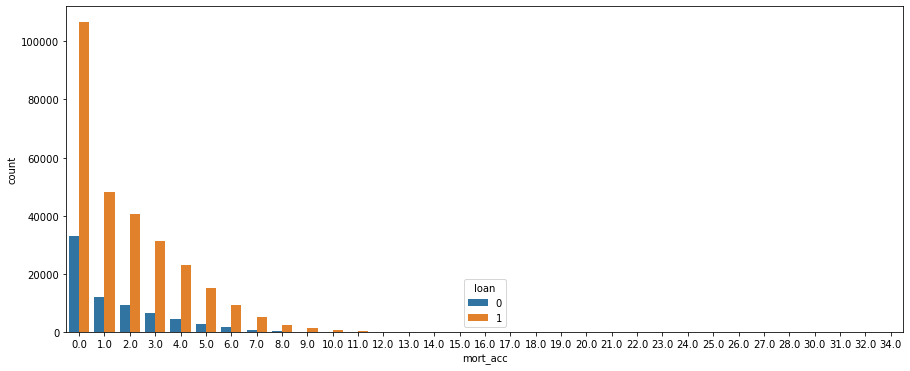

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='mort_acc',hue='loan')

In [9]:
df['mort_acc'].mean()

1.8139908160844138

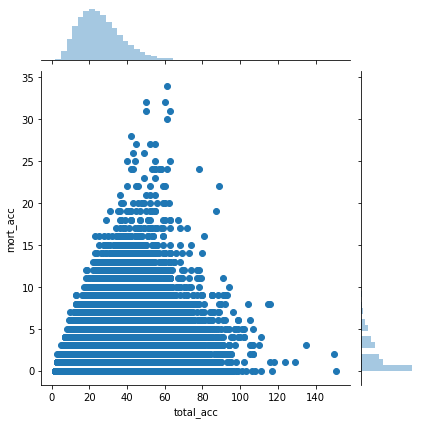

In [83]:
sns.jointplot(data=df,x='total_acc',y='mort_acc')

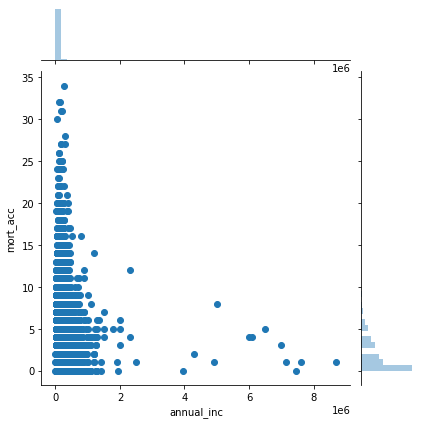

In [84]:
sns.jointplot(data=df,x='annual_inc',y='mort_acc')

In [278]:
df['mort_acc'].fillna(1.8,inplace=True)

In [11]:
df.head(100)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30000.0,36 months,16.49,1061.99,D,D3,Sergeant Major,10+ years,RENT,101000.0,...,1.0,6080.0,76.0,15.0,f,INDIVIDUAL,2.0,1.0,"2528 Herrera Track Suite 897\nSavannahburgh, NY 70466",1
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813",1
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700",0
98,24250.0,60 months,18.64,624.27,E,E1,Keystone Automotive Operations,10+ years,MORTGAGE,46200.0,...,0.0,18894.0,90.0,22.0,f,INDIVIDUAL,1.8,0.0,"7371 Holland Circles Suite 244\nGibsonport, WV 48052",1


In [279]:
df.drop('emp_title',axis=1,inplace=True)


In [280]:
df.drop('emp_length',axis=1,inplace=True)

In [281]:
home = pd.get_dummies(df['home_ownership'],drop_first=True)

In [282]:
a = pd.concat([home],axis=1)

In [283]:
df = pd.merge(df,a,how='outer',on=df.index)

In [284]:
df.drop('home_ownership',axis=1,inplace=True)

In [285]:
df.drop('address',axis=1,inplace=True)

In [286]:
df.drop('loan_status',axis=1,inplace=True)

In [ ]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [291]:
df.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
annual_inc              float64
verification_status      object
issue_d                  object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
loan                      uint8
MORTGAGE                  uint8
NONE                      uint8
OTHER                     uint8
OWN                       uint8
RENT                      uint8
dtype: object

In [292]:
grade = pd.get_dummies(df['grade'],drop_first = True)
sub_grade = pd.get_dummies(df['sub_grade'],drop_first = True)
verification_status = pd.get_dummies(df['verification_status'],drop_first= True)
purpose = pd.get_dummies(df['purpose'],drop_first= True)
initial_list_status = pd.get_dummies(df['initial_list_status'],drop_first = True)
application_type = pd.get_dummies(df['application_type'],drop_first = True)
#new_df

In [293]:
date = pd.to_datetime(df['earliest_cr_line'])

In [294]:
year = date.apply(lambda x:x.year)
df['year'] = year

In [295]:
df.drop('grade',axis=1,inplace=True)
df.drop('sub_grade',axis=1,inplace=True)
df.drop('verification_status',axis=1,inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop('issue_d',axis=1,inplace=True)
df.drop('purpose',axis=1,inplace=True)

df.drop('application_type',axis=1,inplace=True)
df.drop('earliest_cr_line',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)


In [296]:
df = pd.concat([df,sub_grade,verification_status,purpose,initial_list_status,application_type,year],axis=1)

In [297]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,moving,other,renewable_energy,small_business,vacation,wedding,w,INDIVIDUAL,JOINT,earliest_cr_line
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,0,0,1,0,1,1,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,1,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,1,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,1,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,0,0,0,0,0,1,0,1999


In [298]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', 'year', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'w', 'INDIVIDUAL', 'JOINT',
       'earliest_cr_line'],
      dtype='object')

In [300]:
df.dropna(inplace=True)

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', 'year', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'w', 'INDIVIDUAL', 'JOINT',
       'earliest_cr_line'],
      dtype='object')

In [420]:
X = df.drop('loan',axis=1).values
y=df['loan'].values

In [379]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', 'year', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'w', 'INDIVIDUAL', 'JOINT',
       'earliest_cr_line'],
      dtype='object')

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [422]:
from sklearn.preprocessing import MinMaxScaler

In [412]:
scaler = MinMaxScaler()

In [423]:
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

In [368]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense

In [414]:
X_train.shape

(316175, 72)

In [424]:
model = Sequential()

model.add(Dense(72,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(36,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(18,activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [425]:
model.fit(x=X_train,
          y=y_train,
          epochs=30,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=256,
)

Epoch 1/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4770 - val_loss: 0.4599
Epoch 2/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4627 - val_loss: 0.4592
Epoch 3/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4606 - val_loss: 0.4589
Epoch 4/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4587 - val_loss: 0.4583
Epoch 5/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4577 - val_loss: 0.4579
Epoch 6/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4569 - val_loss: 0.4579
Epoch 7/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4567 - val_loss: 0.4565
Epoch 8/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4562 - val_loss: 0.4574
Epoch 9/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4558 - val_loss: 0.4565
Epoch 10/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.455

<AxesSubplot:>

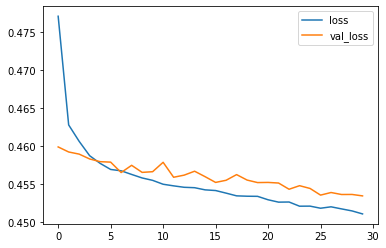

In [426]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [343]:
model.save('loan_model')

INFO:tensorflow:Assets written to: loan_model\assets


In [428]:
predictions = model.predict_classes(X_test)

In [345]:
from sklearn.metrics import confusion_matrix,classification_report

In [429]:
print(confusion_matrix(y_test,predictions))

print(print(classification_report(y_test,predictions)))

[[  107 15551]
 [   71 63315]]
              precision    recall  f1-score   support

           0       0.60      0.01      0.01     15658
           1       0.80      1.00      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.70      0.50      0.45     79044
weighted avg       0.76      0.80      0.72     79044

None
